In [1]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
pic=imageio.imread('')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off');

ValueError: Could not find a format to read the specified file in single-image mode

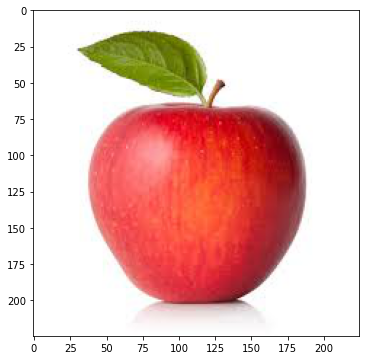

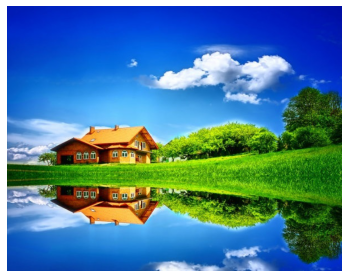

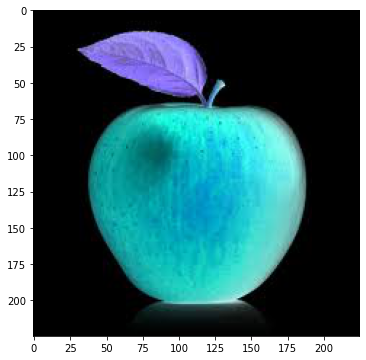

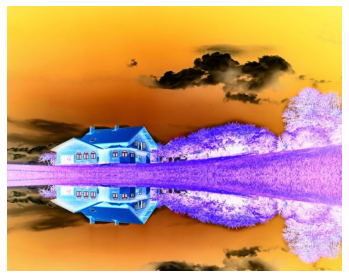

In [1]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
pic1=imageio.imread('apple.jfif')
plt.figure(figsize=(6,6))
plt.imshow(pic1);
pic2=imageio.imread('house.jpg')
plt.figure(figsize=(6,6))
plt.imshow(pic2);
plt.axis('off');


negative1=255-pic1 #neg=(L-1) - img
plt.figure(figsize=(6,6))
plt.imshow(negative1);
negative2=255-pic2
plt.figure(figsize=(6,6))
plt.imshow(negative2);
plt.axis('off');


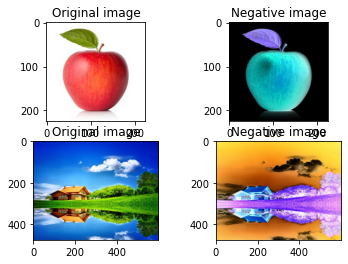

In [2]:
##plotting

rows, cols = 2,2
plt.subplot(rows, cols, 1)
plt.imshow(pic1)
plt.title("Original image")
plt.subplot(rows, cols, 2)
plt.imshow(negative1)
plt.title("Negative image")
plt.subplot(rows, cols, 3)
plt.imshow(pic2)
plt.title("Original image")
plt.subplot(rows, cols, 4)
plt.imshow(negative2)
plt.title("Negative image")

plt.show()


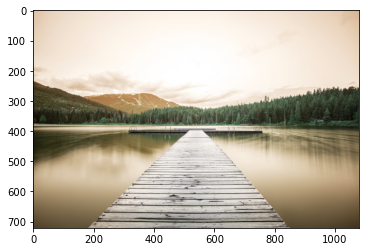

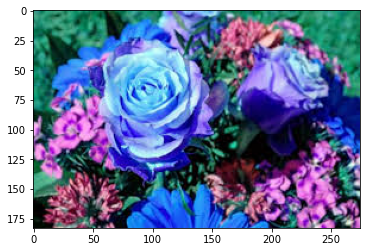

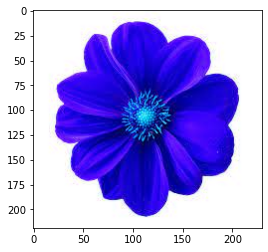

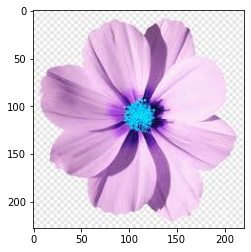

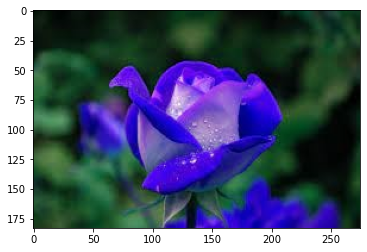

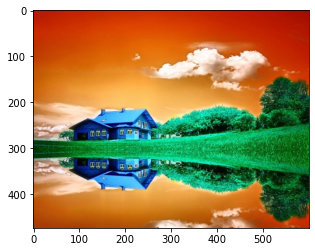

In [3]:
#import necessary packages
import cv2
import imageio
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
 
#Set the path where images are stored
img_dir = "C:/Users/User/Image Processing/images" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)
    plt.figure()
    plt.imshow(img) 

TypeError: Image data of dtype <U15 cannot be converted to float

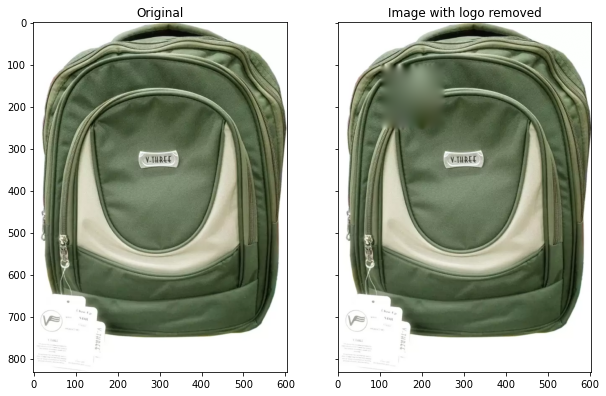

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
   
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    #ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    #ax2.axis('off')


image_with_logo = plt.imread('logo2.webp')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[100:255, 100:255] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')
plt.imshow('plot_comparison')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(cat.png)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5


In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [ ]:
def inpaint_text(img_path, pipeline):
    # read the image 
    img = keras_ocr.tools.read('watermark.jpg') 
    
    # Recogize text (and corresponding regions)
    # Each list of predictions in prediction_groups is a list of
    # (word, box) tuples. 
    prediction_groups = pipeline.recognize([img])
    
    #Define the mask for inpainting
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        #For the line thickness, we will calculate the length of the line between 
        #the top-left corner and the bottom-left corner.
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        #Define the line and inpaint
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(inpainted_img)


Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


True

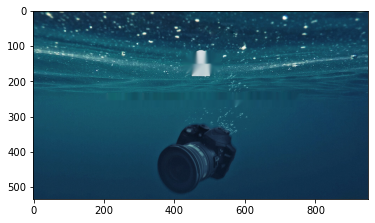

In [28]:
pipeline = keras_ocr.pipeline.Pipeline()

img_text_removed = inpaint_text('../input/traffic-sign/traffic signs/1.jpg', pipeline)

plt.imshow(img_text_removed)

cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))

Looking for C:\Users\User\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\User\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


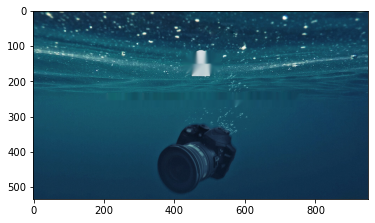

In [38]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
import tensorflow as tf
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read('watermark.jpg')
    # generate (word, box) tuples
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1]
        x2, y2 = box[1][2]
        x3, y3 = box[1][3]
       
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
       
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
       
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

img_text_removed = inpaint_text('../input/traffic-sign/traffic signs/1.jpg', pipeline)

plt.imshow(img_text_removed)

#cv2.imwrite('text_removed_image.jpg', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))


In [39]:
import cv2
from PIL import Image
from skimage import io

IMAGE_WIDTH = 400
IMAGE_HEIGHT = 400

def create_collage(images):
    images = [io.imread(img) for img in images]
    images = [cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT)) for image in images]
    if len(images) > 2:
        half = len(images) // 2
        h1 = cv2.hconcat(images[:half])
        h2 = cv2.hconcat(images[half:])
        concat_images = cv2.vconcat([h1, h2])
    else:
        concat_images = cv2.hconcat(images)
    image = Image.fromarray(concat_images)

    # Image path
    image_name = "kk.png"
    image = image.convert("RGB")
    image.save(f"{image_name}")
    return image_name
images=["flower.jpg","sci.jpg","cat.png","bridge.jpg"]
#image1 on top left, image2 on top rnight, image3 on bottom left,image4 on bottom right
create_collage(images)

'kk.png'

In [7]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    #ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    #ax2.axis('off')

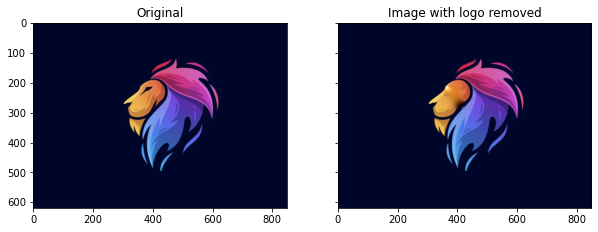

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from skimage import io
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
image_with_logo = plt.imread('logimg.jpg')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')

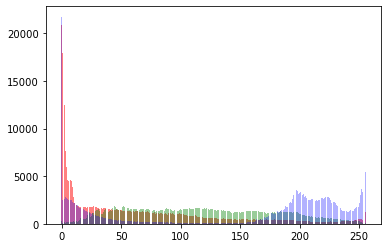

In [1]:
#histogram

from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('house.jpg')
pl=img.histogram()
plt.bar(range(256),pl[:256],color='r',alpha=0.5)
plt.bar(range(256),pl[256:2*256],color='g',alpha=0.4)
plt.bar(range(256),pl[2*256:],color='b',alpha=0.3)
plt.show()

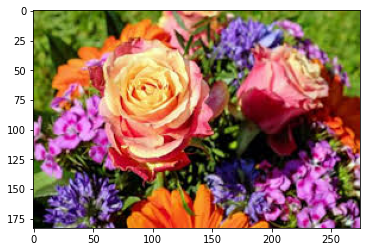

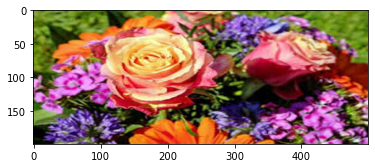

In [31]:
#resize

from PIL import Image
filepath='flower.jpg'
img=Image.open(filepath)
#img.show()
plt.imshow(img)
plt.show()
new_image=img.resize((500,200))
#new_image.show()
plt.imshow(new_image)
plt.show()

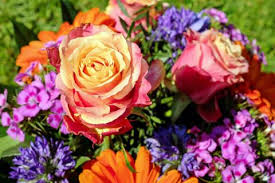

In [26]:
#rotate

from PIL import Image
im=Image.open('flower.jpg')
im



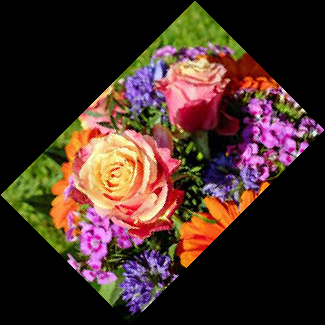

In [27]:
angle=45
out=im.rotate(angle,expand=True)
out.save('rotate_output.jpg')
out

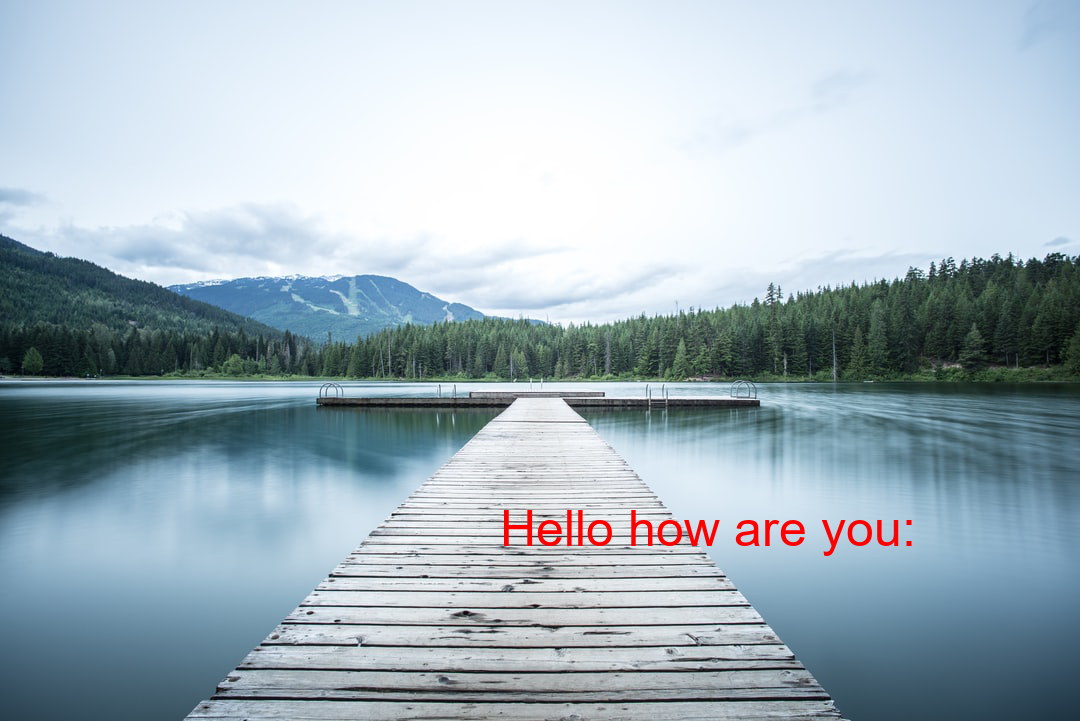

In [28]:
#text on image

from PIL import Image,ImageDraw,ImageFont
img=Image.open('bridge.jpg')
d1=ImageDraw.Draw(img)
font=ImageFont.truetype('arial.ttf',50)
d1.text((500,500),"Hello how are you:",fill=(255,0,0),font=font)
img.show()
img

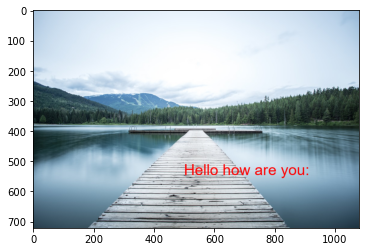

In [19]:
from PIL import Image,ImageDraw,ImageFont
img=Image.open("bridge.jpg")
d1=ImageDraw.Draw(img)
font=ImageFont.truetype('arial.ttf',50)
d1.text((500,500),"Hello how are you:",fill=(255,0,0),font=font)
plt.imshow(img)
plt.show()

In [17]:
#quantization

import cv2
from PIL import Image
image=Image.open('bridge.jpg')
image.show()
img=image.quantize(19)
img.show()